# Examples of feature extraction

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import immas
from immas import MammogramImage
from immas.basic_functions import show_image_plt

## Feature extraction using MammogramImage class

Let's read sample mammogram image first

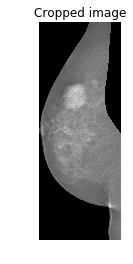

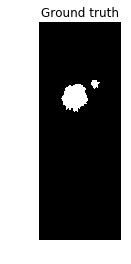

In [21]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, ground_truth_path=path_ground_truth, pmuscle_mask_path=pectoral_muscle)

show_image_plt(mm.image_data,'Cropped image')
show_image_plt(mm.cropped_ground_truth,'Ground truth')

Now we can do features and contours extraction using `get_img_features` function, by default it selects 10 biggest (by area) false positive contours, and true positive contours (masses) if any available.

In [22]:
features, contours = mm.get_img_features()

help(mm.get_img_features)

/home/okozyn/Projects/immas/immas/segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


Help on method get_img_features in module immas.io.mammogram:

get_img_features(contour_max_number=10) method of immas.io.mammogram.MammogramImage instance
    Finds mass candidates contours and their features.
    
    Args:
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



Let's check what output we have. `class_id` field equals to 1 for true positive (masses) and -1 for false positive (not masses). Please pay attention that features are returned in `pandas.DataFrame` format.

In [23]:
features

perimeter      area  circularity            ac  mean_intensity  \
0   4224.076784   23302.5    60.932813    382.429415    32682.298070   
1   2123.929265   12183.0    29.465648    413.464526    32596.632523   
2    964.354461    7791.5     9.498225    820.311172    32766.357361   
3   1184.888512    5667.5    19.713039    287.500063    33529.324276   
4   1136.420477    4818.0    21.330520    225.873538    32298.799508   
5   1393.682449    4751.5    32.530225    146.064161    32703.288885   
6    549.612259    3826.0     6.282869    608.957485    32882.951665   
7   1219.917949    2752.5    43.025314     63.973966    32506.762227   
8    550.139171    1592.5    15.123623    105.298845    33364.647771   
9    705.962545    1480.5    26.788293     55.266679    32823.145928   
10  1743.599186  120333.5     2.010467  59853.513050    32640.330093   
11   485.043720   11603.0     1.613547   7190.989862    32559.567073   

    standard_deviation  smoothness      skewness  class_id  
0         19071.931634         1.0 -2.158255e+10      -1.0  
1         18801.860807         1.0 -2.345094e+09      -1.0  
2         18938.463817         1.0  4.447417e+10      -1.0  
3         18959.452991         1.0 -1.479250e+11      -1.0  
4         18939.138184         1.0  1.376212e+11      -1.0  
5         18810.358412         1.0  4.602172e+10      -1.0  
6         19062.852484         1.0 -1.526180e+11      -1.0  
7         18756.725175         1.0  2.003122e+11      -1.0  
8         19043.606217         1.0 -5.853688e+11      -1.0  
9         18891.401731         1.0 -1.780862e+11      -1.0  
10        18904.684220         1.0  6.647140e+08       1.0  
11        18845.800389         1.0  1.638218e+10       1.0

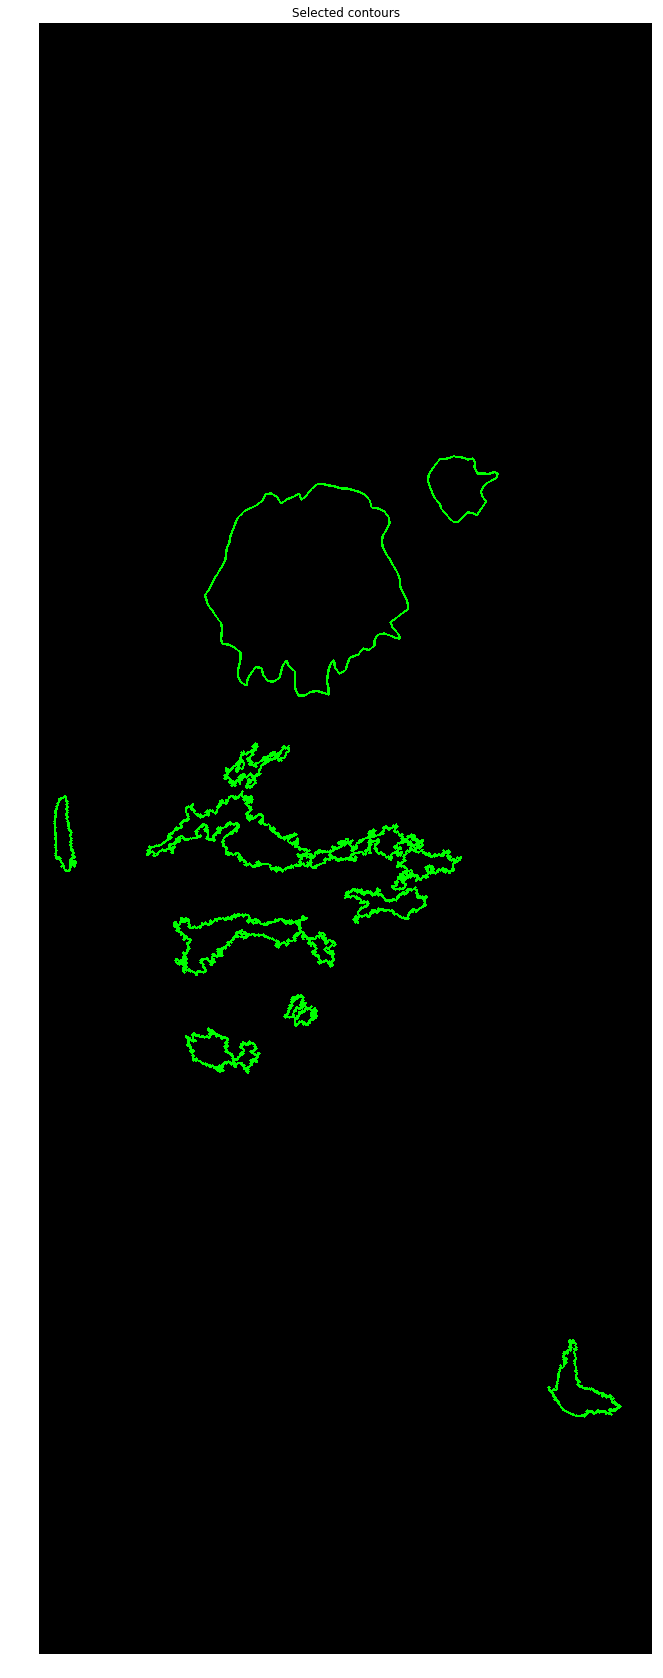

In [24]:
mm_shape = mm.image_data.shape

img_color = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color, contours, -1, (0,255,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color,'Selected contours')

## Feature extraction using get_img_features function

Features can be extracted from mammogram images using this helper function as well. We need to provide ground thruth mask separately.

In [25]:
from immas import get_img_features

help(get_img_features)

Help on function get_img_features in module immas.features.get_features:

get_img_features(img, mask_ground_truth=None, contour_max_number=10)
    Function calculates features of the given image. Class id for the true positive is 1,
    and for the false positive (not masses) -1.
    
    Args:
        img (numpy.array): image, which features to find
        mask_ground_truth (np.array): mask for extracting mass region, default is None.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



In [26]:
features2, contours2 = get_img_features(mm.image_data)

/home/okozyn/Projects/immas/immas/segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [27]:
features2

perimeter     area  circularity           ac  mean_intensity  \
0  3730.790428  98674.0    11.225071  8790.500926    32605.740959   
1  4224.076784  23302.5    60.932813   382.429415    32682.298070   
2  2123.929265  12183.0    29.465648   413.464526    32596.632523   
3   964.354461   7791.5     9.498225   820.311172    32766.357361   
4  1184.888512   5667.5    19.713039   287.500063    33529.324276   
5  1136.420477   4818.0    21.330520   225.873538    32298.799508   
6  1393.682449   4751.5    32.530225   146.064161    32703.288885   
7   549.612259   3826.0     6.282869   608.957485    32882.951665   
8  1219.917949   2752.5    43.025314    63.973966    32506.762227   
9   766.004175   2041.0    22.877544    89.214121    32094.653503   

   standard_deviation  smoothness      skewness  class_id  
0        18878.544965         1.0  1.713565e+10      -1.0  
1        19071.931634         1.0 -2.158255e+10      -1.0  
2        18801.860807         1.0 -2.345094e+09      -1.0  
3        18938.463817         1.0  4.447417e+10      -1.0  
4        18959.452991         1.0 -1.479250e+11      -1.0  
5        18939.138184         1.0  1.376212e+11      -1.0  
6        18810.358412         1.0  4.602172e+10      -1.0  
7        19062.852484         1.0 -1.526180e+11      -1.0  
8        18756.725175         1.0  2.003122e+11      -1.0  
9        18755.224715         1.0  2.747701e+11      -1.0

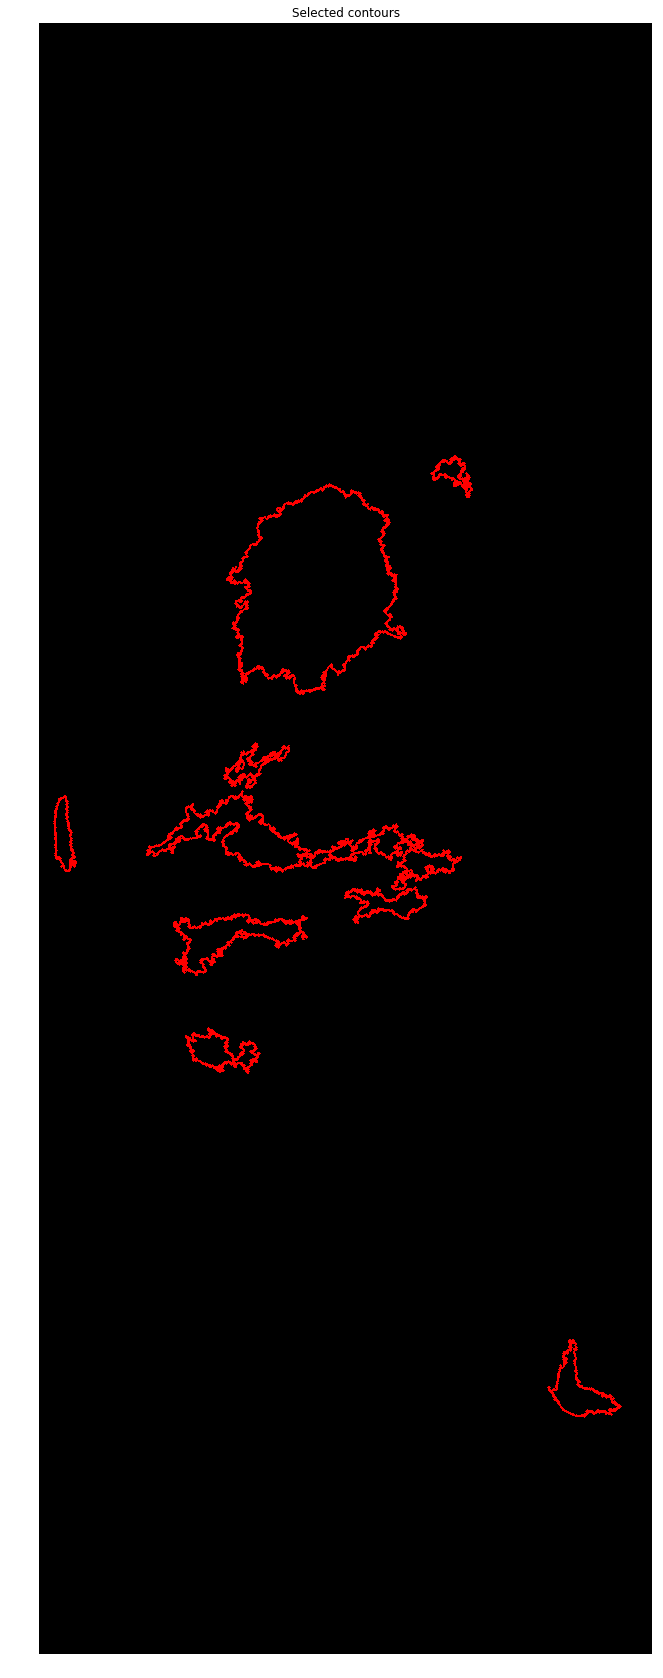

In [28]:
mm_shape = mm.image_data.shape

img_color2 = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color2, contours2, -1, (255,0,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color2,'Selected contours')

## Reading features of several images

`get_dataset_features` function can be used for feature extraction from whole dataset.

In [29]:
from immas import get_dataset_features

help(get_dataset_features)

Help on function get_dataset_features in module immas.features.get_features:

get_dataset_features(data, contour_max_number=10)
    Function returns list of features for all of the mammograms.
    
    Args:
        data ([MammogramImage]): list (iterable) of the mammograms from dataset.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        pandas.DataFrame: feature of all images combined in one data table.



In [30]:
# let's create sample dataset of two images
path_image1 = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask1 = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth1 = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle1 = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

path_image2 = "../dataset/images/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"
path_mask2 = "../dataset/masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.png"
pectoral_muscle2 = "../dataset/pectoral_muscle_masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"

mm1 = MammogramImage(path_image1, 
                     path_mask1, 
                     ground_truth_path=path_ground_truth1, 
                     pmuscle_mask_path=pectoral_muscle1,
                     load_data=False)
mm2 = MammogramImage(path_image2, 
                     path_mask2, 
                     pmuscle_mask_path=pectoral_muscle2,
                     load_data=False)
dataset = [mm1, mm2]

In [31]:
# read features of all images in the dataset
dataset_features = get_dataset_features(dataset, contour_max_number=5)

/home/okozyn/Projects/immas/immas/segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [32]:
dataset_features

perimeter      area  circularity            ac  mean_intensity  \
0   4224.076784   23302.5    60.932813    382.429415    32682.298070   
1   2123.929265   12183.0    29.465648    413.464526    32596.632523   
2    964.354461    7791.5     9.498225    820.311172    32766.357361   
3   1184.888512    5667.5    19.713039    287.500063    33529.324276   
4   1136.420477    4818.0    21.330520    225.873538    32298.799508   
5   1743.599186  120333.5     2.010467  59853.513050    32640.330093   
6    485.043720   11603.0     1.613547   7190.989862    32559.567073   
7   2097.942335   31916.5    10.973925   2908.394337    32797.452256   
8   1530.856987    7554.0    24.687800    305.981087    32717.045399   
9   1852.660152    6006.0    45.477473    132.065384    32748.098702   
10  1015.584908    5978.5    13.728730    435.473622    32570.077932   
11   828.330076    3202.5    17.049351    187.837059    33147.980508   

    standard_deviation  smoothness      skewness  class_id  
0         19071.931634         1.0 -2.158255e+10      -1.0  
1         18801.860807         1.0 -2.345094e+09      -1.0  
2         18938.463817         1.0  4.447417e+10      -1.0  
3         18959.452991         1.0 -1.479250e+11      -1.0  
4         18939.138184         1.0  1.376212e+11      -1.0  
5         18904.684220         1.0  6.647140e+08       1.0  
6         18845.800389         1.0  1.638218e+10       1.0  
7         18966.369239         1.0 -7.126792e+09      -1.0  
8         18912.067230         1.0 -1.021531e+11      -1.0  
9         18702.087354         1.0 -6.414642e+10      -1.0  
10        18780.396973         1.0  1.065068e+11      -1.0  
11        18864.757459         1.0  8.323793e+09      -1.0

### Our dataset features can be easily saved into `.csv` file for futher usage

In [23]:
dataset_features.to_csv("./sample-features.csv")